<a href="https://colab.research.google.com/github/Satwikram/NLP-Implementations/blob/main/OCR/Image%20Pre-Processing%20for%20OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

Image Pre-Processing for OCR

### Importing Dependencies

In [ ]:
img!pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter

### Thresh

In [2]:
img = cv2.imread("/content/Page_0.png", cv2.IMREAD_GRAYSCALE)
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

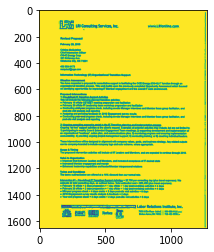

In [3]:
plt.imshow(img)

In [4]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

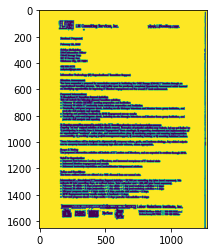

In [5]:
plt.imshow(erosion)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  81  160]
 [  81  161]
 [  81  162]
 ...
 [1572  639]
 [1573  600]
 [1576  637]]
-89.95132446289062
[INFO] angle: -0.049


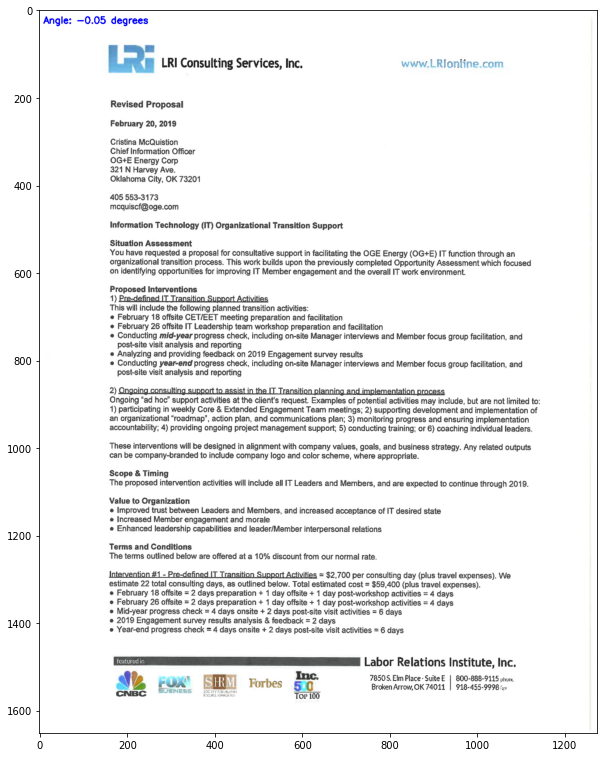

In [6]:
image = cv2.imread("/content/Page_0.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

print(thresh)
coords = np.column_stack(np.where(thresh > 0))
print(coords)
angle = cv2.minAreaRect(coords)[-1]
print(angle)

if angle < -45:
	angle = -(90 + angle)

else:
	angle = -angle


(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
# show the output image
print("[INFO] angle: {:.3f}".format(angle))
plt.figure(figsize=(10, 15))
rotated = rotated / 255.0
plt.imshow(rotated)

### Removing the Noise

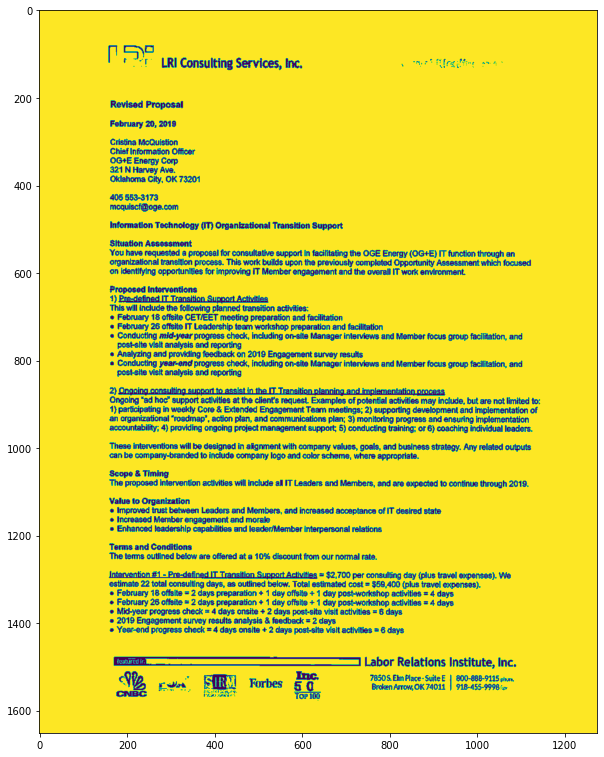

In [7]:
image = cv2.imread('/content/Page_0.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
out_gray=cv2.divide(image, bg, scale=255)
out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
plt.figure(figsize=(10, 15))
plt.imshow(out_binary)

In [15]:
import layoutparser as lp


model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})


The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [18]:
img = cv2.imread("/content/Page_0.png")
layout = model.detect(img)

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [ ]:
lp.draw_box(img, layout, box_width=3)